[Reference for the Below Analysis](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/)

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Time Series Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_excel('../Data/monthly_data_total.xlsx')
df.head()

,Date,Import,Export
0,2006-01-01,12519.71,9143.66
1,2006-02-01,11479.69,8993.29
2,2006-03-01,14314.02,11560.97
3,2006-04-01,12924.18,8624.66
4,2006-05-01,15105.67,10109.30


In [4]:
test_size = 13

In [5]:
df.index = df.Date

In [6]:
df.drop('Date', axis =1, inplace = True)

In [7]:
df.head()

,Import,Export
Date,,
2006-01-01,12519.71,9143.66
2006-02-01,11479.69,8993.29
2006-03-01,14314.02,11560.97
2006-04-01,12924.18,8624.66
2006-05-01,15105.67,10109.30


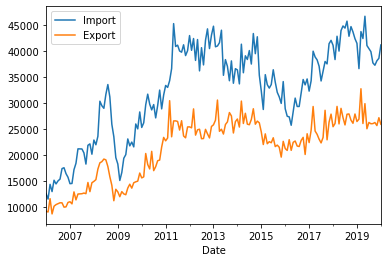

In [8]:
df.plot()

Checking if the data is stationary or not esle we will first make it stationary

In [9]:
df_train = df[: -test_size]
df_train

,Import,Export
Date,,
2006-01-01,12519.71,9143.66
2006-02-01,11479.69,8993.29
2006-03-01,14314.02,11560.97
2006-04-01,12924.18,8624.66
2006-05-01,15105.67,10109.30
...,...,...
2018-08-01,45730.72,27807.88
2018-09-01,42819.20,27865.54
2018-10-01,44677.50,26673.52


In [10]:
df_test = df[-test_size:]
df_test

,Import,Export
Date,,
2019-01-01,41454.91,26408.97
2019-02-01,36590.02,26865.68
2019-03-01,43718.65,32717.30
2019-04-01,42384.92,26025.68
2019-05-01,46672.49,29847.36
2019-06-01,41032.13,25017.07
2019-07-01,40430.18,26227.10
2019-08-01,39852.43,25981.42
2019-09-01,37693.81,26007.97


In [11]:
def rmse(predictions, targets): 

  return np.sqrt(((predictions - targets) ** 2).mean())

## AR (Autoregression)

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is suitable for univariate time series without trend and seasonal components.

In [12]:
# We can use the ARMA class to create an MA model and setting a zeroth-order AR model. We must specify the order of the MA model in the order argument.

# MA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# Import
# fit model import
model = ARMA(df_train['Import'], order=(0, 10))
model_fit = model.fit(disp=False)
# make prediction
yhat_import = model_fit.predict(len(df_train), len(df_train)+ test_size-1)
# Export
# fit model export
model2 = ARMA(df_train['Export'], order=(0, 12))
model2_fit = model2.fit(disp=False)
# make prediction
yhat_export = model2_fit.predict(len(df_train), len(df_train)+ test_size-1)

c:\users\akars\documents\indian-import-export-data-analysis\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\akars\documents\indian-import-export-data-analysis\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [13]:
%matplotlib notebook

<IPython.core.display.Javascript object>


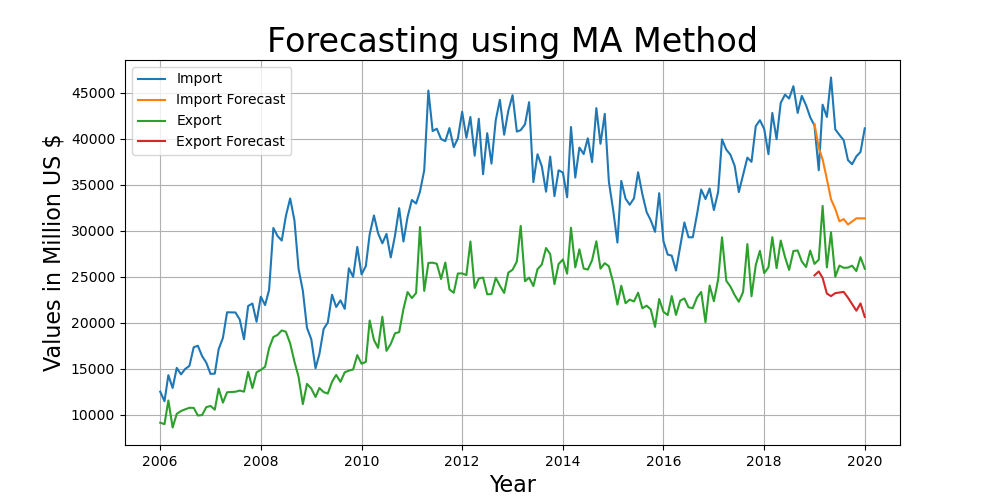

In [14]:
plt.figure(figsize=(10,5))
plt.plot( df['Import'], label='Import')
plt.plot( yhat_import, label='Import Forecast')
plt.plot( df['Export'], label='Export')
plt.plot( yhat_export, label='Export Forecast')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Values in Million US $', fontsize = 16)
plt.title('Forecasting using MA Method', fontsize = 24)
plt.grid()
plt.legend()
plt.show()

In [15]:
rmse(df_test.Import.values, yhat_import).round(2), rmse(df_test.Export.values, yhat_export).round(2)

(7743.73, 4284.66)

## To Find Order

In [16]:
# for i in range(15):
#     try:
#         model = ARMA(df_train['Import'], order=(0, i))
#         model_fit = model.fit(disp=False)
#         # make prediction
#         yhat_import = model_fit.predict(len(df_train), len(df_train)+ 11)
#         print(i,rmse(df_test.Import.values, yhat_import))
#     except:
#         pass

In [17]:
# for i in range(15):
#     try:
#         model2 = ARMA(df_train['Export'], order=(0, i))
#         model2_fit = model2.fit(disp=False)
#         # make prediction
#         yhat_export = model2_fit.predict(len(df_train), len(df_train)+ 11)
#         print(i,rmse(df_test.Export.values, yhat_export))
#     except:
#         pass